In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


import seaborn as sns
sns.set(color_codes=True)
sns.set_style('white')
%matplotlib notebook


### Load the incidents dataset 

In [191]:
incidents = pd.read_excel('incident_dataset.xlsx', sheet_name='Sheet2')
incidents.head()

,Date,AvgBackgroundQ,AvgThreadPoolSize,AvgWorkflowQ,CatalogSearchTime,IncreasingBGQueueTrend,IncreasingThreadTrend,IncreasingWFQueueTrend,Exception,LogSizeVolumePercent,NetworkConnectivitySNV-US1,IsProductReleased,UiNodeThreadsCount,CloudHealthIndex,Label
0,2017-01-01 00:00:00,296.0,9.0,14.0,16.0,0,0,0,spanning tree event,39.0,1.0,1.0,13.0,FAIR,NetworkIssue
1,2017-01-01 00:30:00,284.0,9.0,8.0,15.0,0,0,0,spanning tree event,40.0,1.0,1.0,13.0,GOOD,NetworkIssue
2,2017-01-01 01:00:00,NaN,9.0,14.0,13.0,0,0,0,spanning tree event,26.0,1.0,0.0,19.0,POOR,NetworkIssue
3,2017-01-01 01:30:00,289.0,8.0,14.0,11.0,0,0,0,spanning tree event,39.0,1.0,0.0,12.0,NaN,NetworkIssue
4,2017-01-01 02:00:00,304.0,10.0,10.0,10.0,0,0,0,spanning tree event,29.0,1.0,1.0,11.0,GOOD,NetworkIssue


In [192]:
incidents.describe()

,AvgBackgroundQ,AvgThreadPoolSize,AvgWorkflowQ,CatalogSearchTime,IncreasingBGQueueTrend,IncreasingThreadTrend,IncreasingWFQueueTrend,LogSizeVolumePercent,NetworkConnectivitySNV-US1,IsProductReleased,UiNodeThreadsCount
count,997.000000,1002.000000,1002.000000,1003.000000,1009.000000,1009.000000,1009.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,342.086259,11.578842,12.588822,13.979063,0.011893,0.018831,0.013875,34.641000,0.028000,0.475000,46.001000
std,241.686803,9.417727,9.670629,6.023620,0.108458,0.135994,0.117031,11.714151,0.165055,0.499624,92.209726
min,280.000000,8.000000,8.000000,10.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,10.000000
25%,290.000000,9.000000,9.000000,11.000000,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,13.000000
50%,300.000000,10.000000,11.000000,13.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,16.000000
75%,310.000000,11.000000,13.000000,15.000000,0.000000,0.000000,0.000000,37.000000,0.000000,1.000000,19.000000
max,1800.000000,70.000000,79.000000,55.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,600.000000


In [193]:
# incidents['AvgBackgroundQ'].hist()

<IPython.core.display.Javascript object>


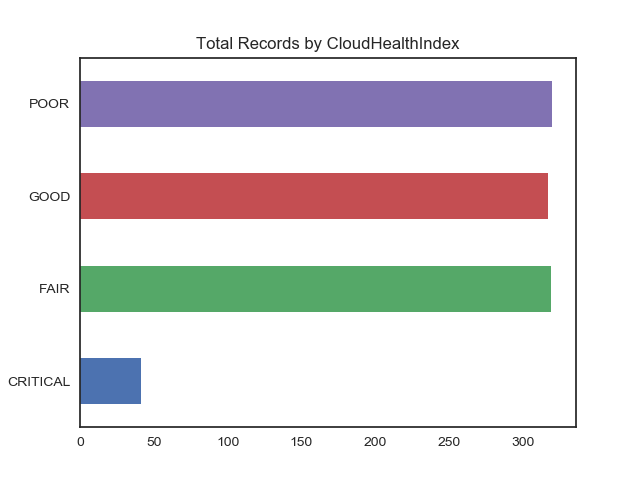

In [194]:
fig1 = plt.figure()
incidents.groupby(['CloudHealthIndex']).apply(lambda x : x['CloudHealthIndex'].count()).plot(kind='barh', 
                                                                    title='Total Records by CloudHealthIndex')

fig1.savefig('cloudhealth_bargraph.png')

<IPython.core.display.Javascript object>


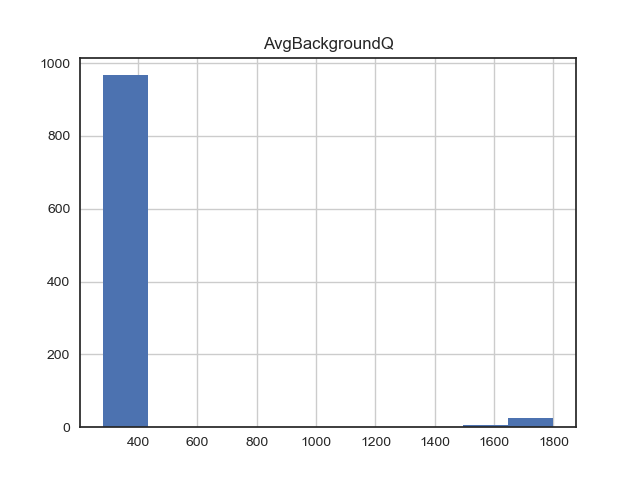

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1D84F0B0>]],
      dtype=object)

In [165]:
incidents[['AvgBackgroundQ']].hist()

In [21]:
# incidents[['UiNodeThreadsCount']].plot(figsize=(20,15))

In [22]:
incidents.columns

Index(['Date', 'AvgBackgroundQ', 'AvgThreadPoolSize', 'AvgWorkflowQ',
       'CatalogSearchTime', 'IncreasingBGQueueTrend', 'IncreasingThreadTrend',
       'IncreasingWFQueueTrend', 'Exception', 'LogSizeVolumePercent',
       'NetworkConnectivitySNV-US1', 'IsProductReleased', 'UiNodeThreadsCount',
       'CloudHealthIndex', 'Label'],
      dtype='object')

In [23]:
# inc_tmp = incidents[['AvgBackgroundQ', 'AvgThreadPoolSize']]
# _ = pd.tools.plotting.scatter_matrix(inc_tmp, figsize=(9,9))

### Explore Label distibution of Incident Type in dataset

In [24]:
incidents.groupby('Label').apply(lambda x : x['Label'].count())

Label
Community-FromtDoorNotaccessible     30
CommunityHealthIssue                 30
DataLoad Failure                     29
DatabaseConnection                   30
InvoiceIssue                         30
NetworkIssue                         29
NoIssue                             800
UnsearchableWorkspaces               31
dtype: int64

<IPython.core.display.Javascript object>


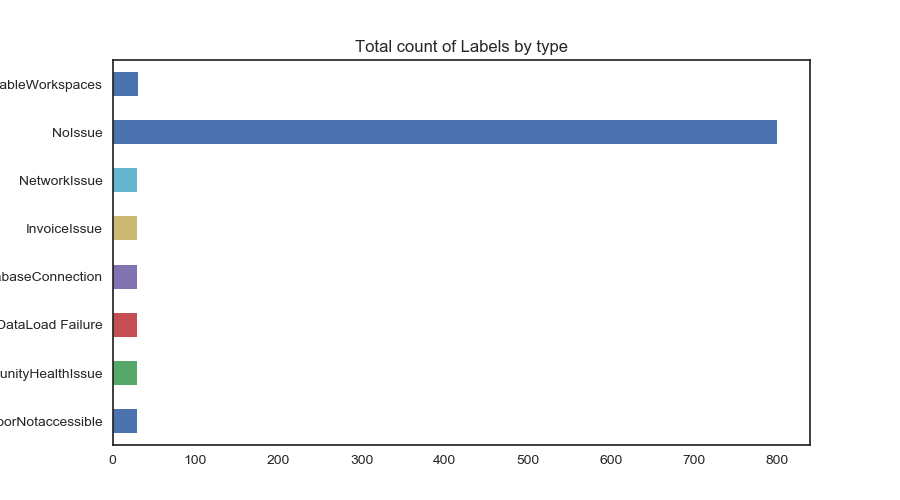

In [195]:
fig2 = plt.figure()
incidents.groupby('Label').apply(lambda x : x['Label'].count()).plot(kind='barh', figsize=(9,5),
                                                                     title='Total count of Labels by type')
fig2.savefig('label_horizontal_bar.png')

<IPython.core.display.Javascript object>


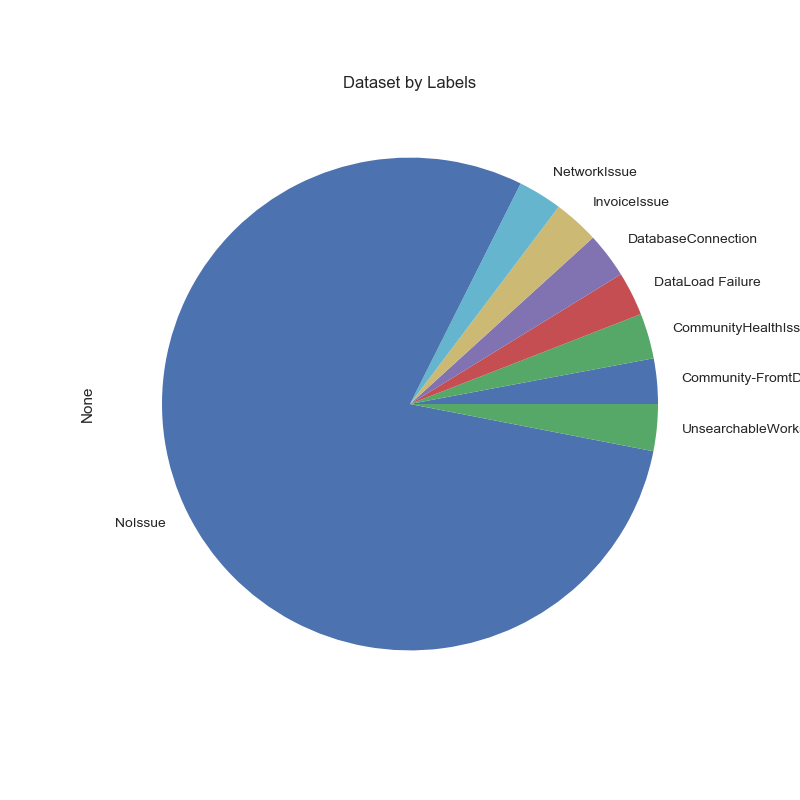

In [275]:
fig3 = plt.figure()
pie_chart_labels = incidents.groupby('Label').apply(lambda x : x['Label'].count()).plot(kind='pie', figsize=(8,8),
                                                                     title='Dataset by Labels')
fig3.savefig('pie_chart_labels.png')

In [196]:
#sns.jointplot(incidents['AvgBackgroundQ'], incidents['AvgThreadPoolSize'], alpha=0.3);

In [198]:
# inc1 = incidents[['AvgBackgroundQ', 'AvgThreadPoolSize', 'AvgWorkflowQ',
#        'CatalogSearchTime', 'Label']]
# inc1.fillna(-999, inplace=True)
# inc1.head()

In [199]:
# f4 = sns.pairplot(inc1, hue='Label',  diag_kind='kde', size=3)
# f4.savefig('qsize_pairplot.png')

<IPython.core.display.Javascript object>


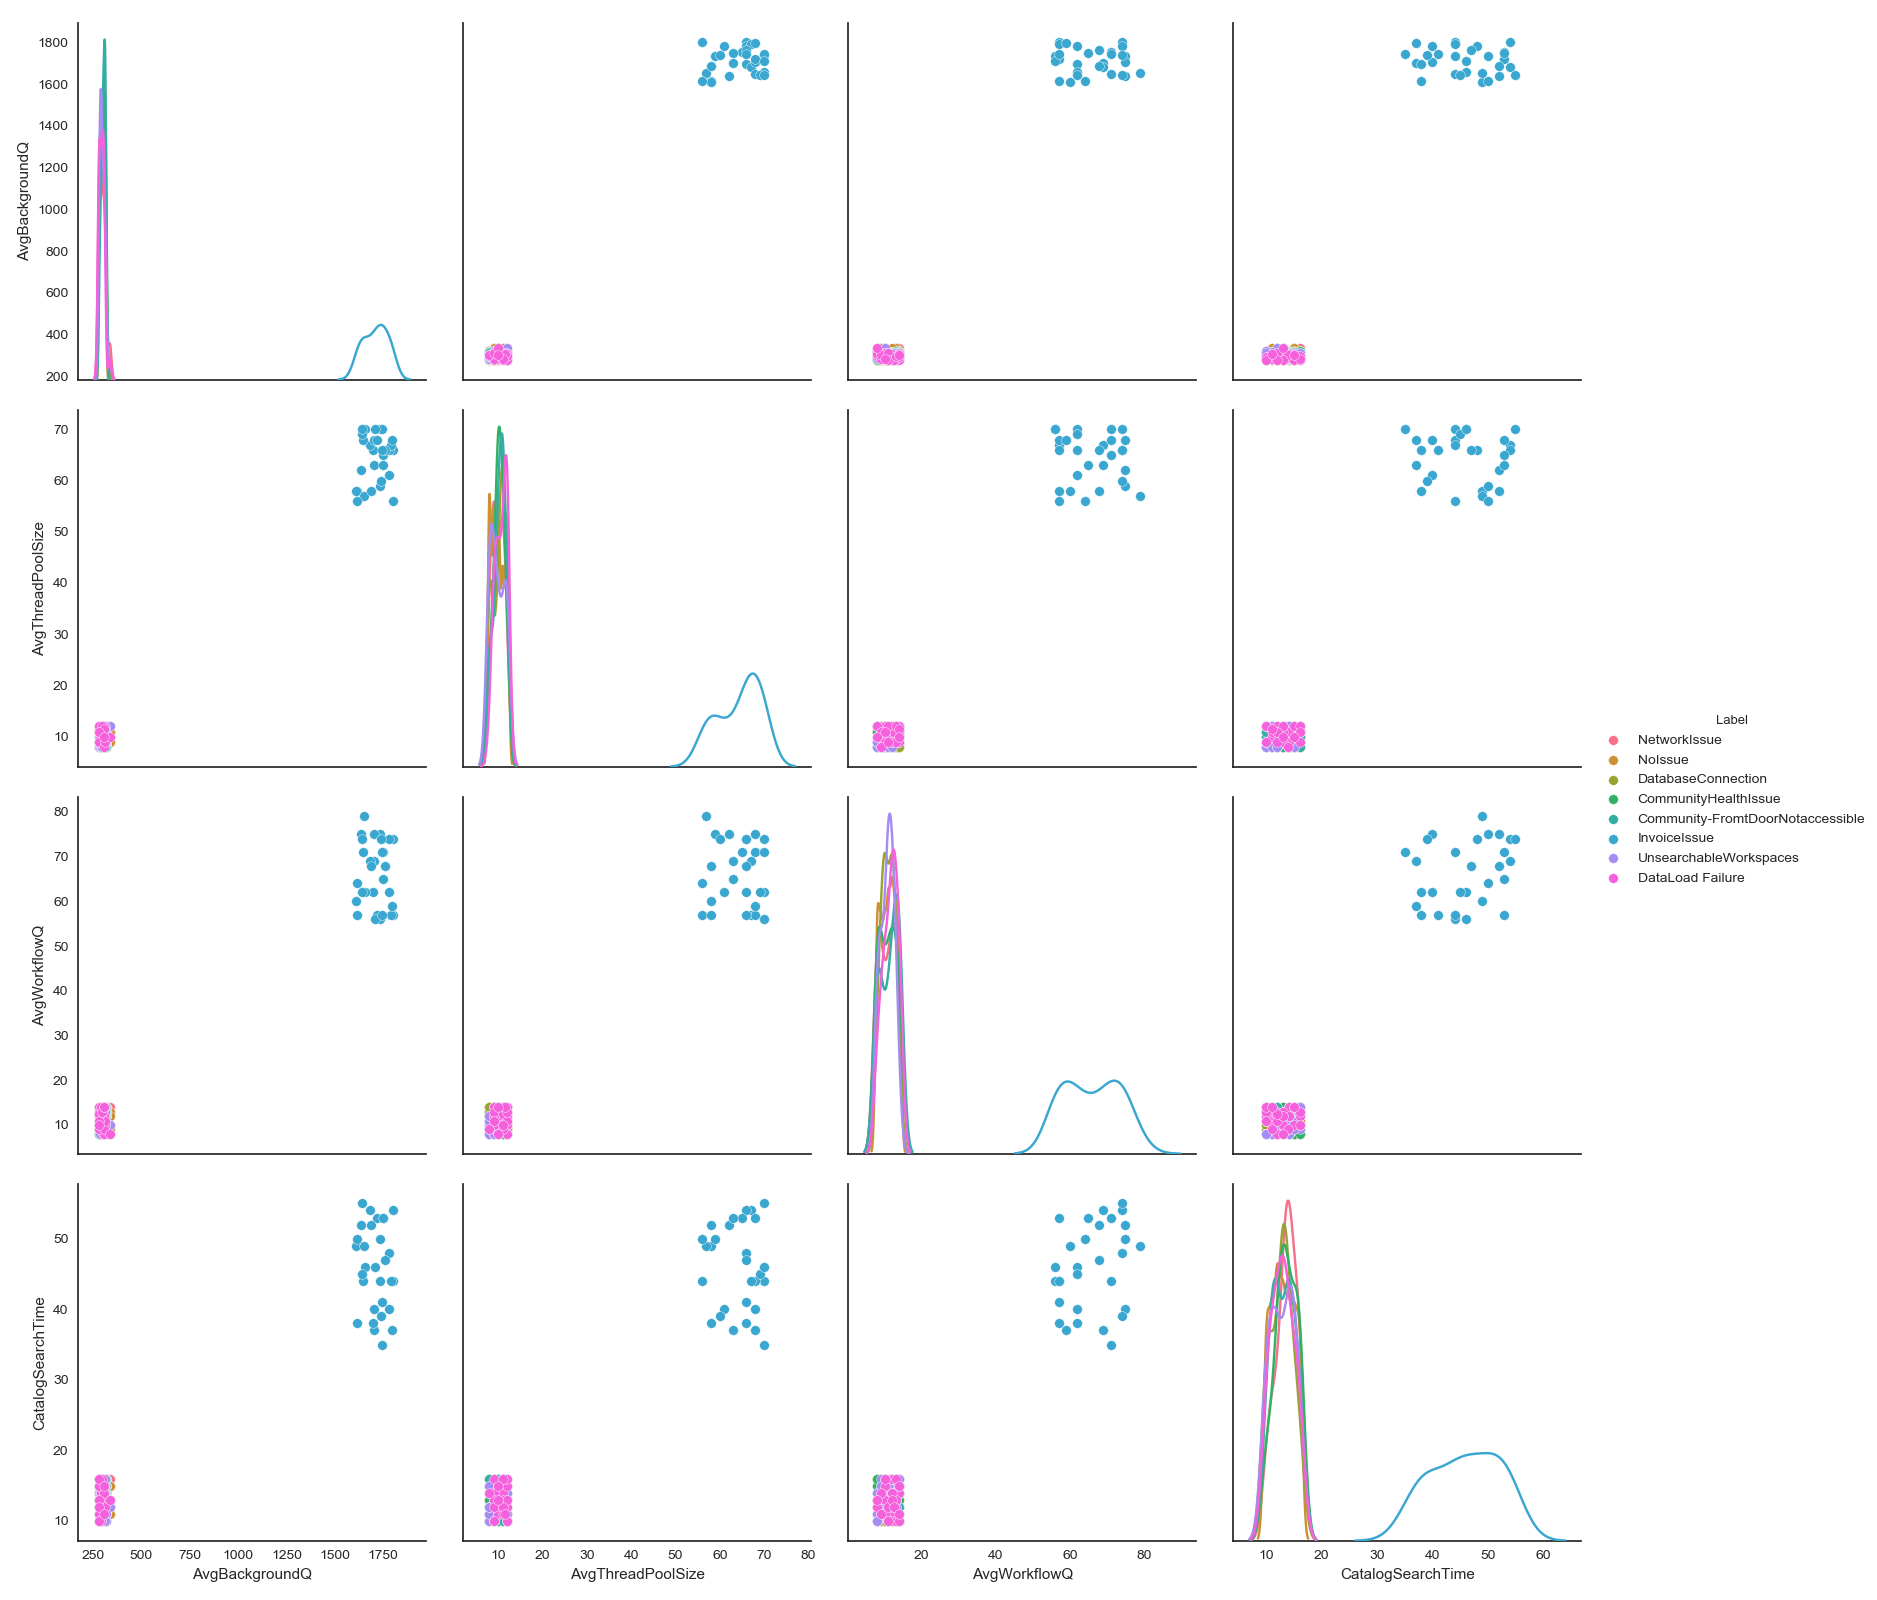

In [201]:
# plt.figure(figsize=(8,6))
# plt.subplot(121)
# sns.swarmplot('Label', 'AvgThreadPoolSize', data=inc1);
# plt.subplot(122)
# sns.violinplot('Label', 'AvgBackgroundQ', data=inc1);
incidents2 = incidents.copy()

inc2 = incidents2[['AvgBackgroundQ', 'AvgThreadPoolSize', 'AvgWorkflowQ',
       'CatalogSearchTime', 'Label']]
inc2.fillna(0, inplace=True)
# inc2.head()


inc2['AvgBackgroundQ'][inc2['AvgBackgroundQ'] < 1] = inc2['AvgBackgroundQ'].mean()
# inc2['AvgBackgroundQ'].fillna(inc2['AvgBackgroundQ'].mean(), inplace=True)
# inc

inc2['AvgThreadPoolSize'][inc2['AvgThreadPoolSize'] < 1] = inc2['AvgThreadPoolSize'].mean()
# inc2['AvgThreadPoolSize'].fillna(inc2['AvgThreadPoolSize'].mean(), inplace=True)

inc2['AvgWorkflowQ'][inc2['AvgWorkflowQ'] < 1] = inc2['AvgWorkflowQ'].mean()
# inc2['AvgWorkflowQ'].fillna(inc2['AvgWorkflowQ'].mean(), inplace=True)

inc2['CatalogSearchTime'][inc2['CatalogSearchTime'] < 1] = inc2['CatalogSearchTime'].mean()
# inc2['CatalogSearchTime'].fillna(inc2['CatalogSearchTime'].mean(), inplace=True)

# incidents2['UiNodeThreadsCount'][incidents2['UiNodeThreadsCount'] < 1] = incidents2['UiNodeThreadsCount'].mean()


f55 = sns.pairplot(inc2, hue='Label',  diag_kind='kde', size=4)
f55.savefig('qsize_pairplot_new.png')
# plt.tight_layout()

<IPython.core.display.Javascript object>


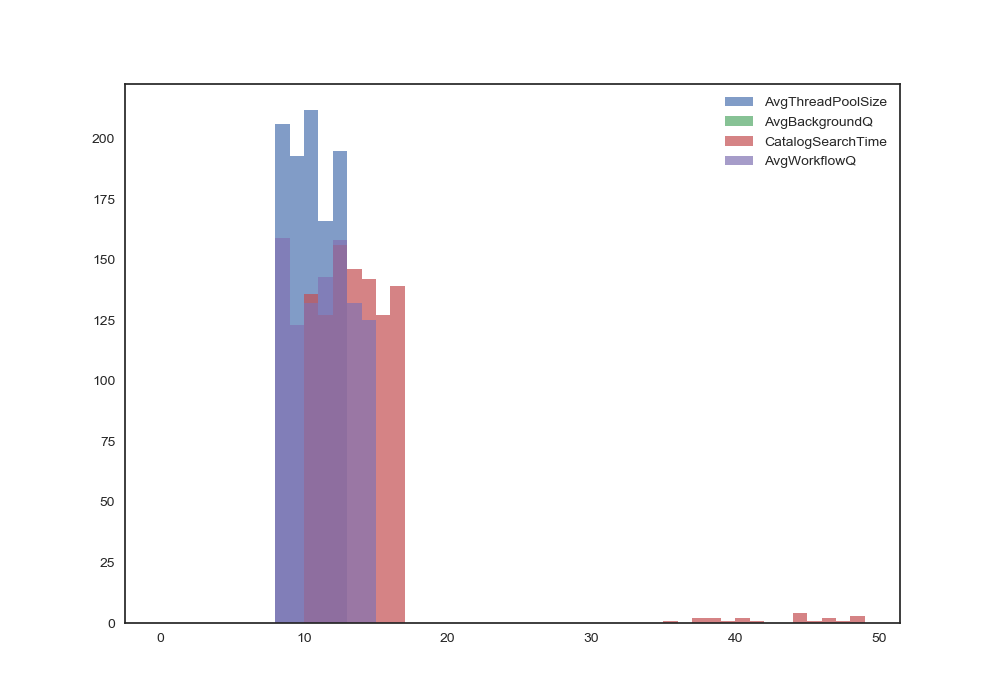

In [202]:
fig5 = plt.figure(figsize=(10,7))
plt.hist(inc1['AvgThreadPoolSize'], alpha=0.7, bins=np.arange(0,50,1), label='AvgThreadPoolSize');
plt.hist(inc1['AvgBackgroundQ'], alpha=0.7, bins=np.arange(0,50,1), label='AvgBackgroundQ');
plt.hist(inc1['CatalogSearchTime'], alpha=0.7, bins=np.arange(0,50,1), label='CatalogSearchTime');
plt.hist(inc1['AvgWorkflowQ'], alpha=0.7, bins=np.arange(0,50,1), label='AvgWorkflowQ');

plt.legend();

fig5.savefig('features_hist.png')

In [187]:
exceptionTypes = dict(zip(incidents['Exception'].unique(), np.arange(incidents['Exception'].unique().size)))
incidentTypesDict = dict(zip(incidents['Label'].unique(), np.arange(incidents['Label'].unique().size)))

inc2 = pd.DataFrame(incidents[['Exception', 'UiNodeThreadsCount', 'Label', 'AvgThreadPoolSize']])
inc2['ExCode'] = inc2['Exception'].replace(exceptionTypes)
# inc2.dropna(inplace=True)
# colordict = {'pink' : 0, 'red' :1, 'blue' :2, 'cyan' :3, 'green' :4}
inc2['LabelCode'] = inc2['Label'].replace([incidentTypesDict])
inc2.head()

,Exception,UiNodeThreadsCount,Label,AvgThreadPoolSize,ExCode,LabelCode
0,spanning tree event,13.0,NetworkIssue,9.0,0,NetworkIssue
1,spanning tree event,13.0,NetworkIssue,9.0,0,NetworkIssue
2,spanning tree event,19.0,NetworkIssue,9.0,0,NetworkIssue
3,spanning tree event,12.0,NetworkIssue,8.0,0,NetworkIssue
4,spanning tree event,11.0,NetworkIssue,10.0,0,NetworkIssue


In [203]:
# list(incidentTypesDict.keys())

In [204]:
from matplotlib.colors import ListedColormap

cMap = ListedColormap(['white', 'green', 'blue','red', 'pink'])

fig5= plt.figure(figsize=(15,5))
plt.scatter(inc2['UiNodeThreadsCount'], inc2['ExCode'])
plt.yticks(np.arange(6), inc2.Exception.unique())
ax = fig5.gca()
ax.set_xlabel('UiNodeThreadsCount')
ax.set_ylabel('Exception')
# ax.set_yticklabels(exceptionTypes,  ha='right')
# plt.tight_layout()
ax.legend(list(incidentTypesDict.keys()))
fig5.savefig('Exception-thredcount.png')

<IPython.core.display.Javascript object>

KeyError: 'UiNodeThreadsCount'